# Actividad: Regresión Lineal
### Tania Sayuri Guizado Hernandez A01640092

Utiliza un modelo de regresión lineal múltiple para predecir el salario en dolares (salary_in_usd) de cada empleado. Las variables regresoras de tu modelo deben de ser las siguientes: nivel de experiencia (experience_level), tipo de empleo (employment_type), salario (salary) y radio remoto (remote_ratio).

Importamos las librerías necesarias para el desarrollo  de la actividad.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('ds_salaries.csv')

Confirmamos que la base de datos este completa y no contenga valores nulos. Ya que de lo contrario será necesario realizar una imputación de datos.

In [2]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Eliminamos las columnas que contiene información que no será utilizada en el modelo.

In [3]:
df = df.drop(['job_title','salary_currency','employee_residence','company_location','company_size','work_year'],axis=1)

Como los datos de las columnas de 'experience_level' y 'employment_type' son categóricos, se procede a convertirlos a numéricos para poder trabajar con ellos.

In [4]:
dummiesExp = pd.get_dummies(df['experience_level'],prefix ='ExpLevel')

In [5]:
dummiesEmp = pd.get_dummies(df['employment_type'],prefix ='EmpType')

Las dummies creadas las concatenamos al dataframe original y eliminamos la columna original de la variable categórica.



In [6]:
df=pd.concat([df,dummiesExp,dummiesEmp],axis=1)

In [7]:
df = df.drop(['experience_level','employment_type','Unnamed: 0'],axis=1)

Comenzando con nuestro modelo de regresión lineal multiple, el cual se basa en la siguiente ecuación:
y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e
Donde:
y = variable dependiente
x1, x2, ..., xn = variables independientes
b0 = constante
b1, b2, ..., bn = coeficientes
e = error aleatorio

Veremos si las variables regresoras son independientes, revisando la correlación entre ellas.

In [8]:
correlacion= df.corr()

In [9]:
alta_corr=np.where((correlacion>0.95)&(correlacion<1))

In [10]:
alta_corr

(array([], dtype=int64), array([], dtype=int64))

In [11]:
baja_corr=np.where((correlacion<-0.95)&(correlacion>-1))

In [12]:
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Al no encontrar ni baja ni alta correlación entre las variables, se procede a realizar la regresión lineal múltiple con todas las variables.

In [13]:
df=pd.DataFrame(df,columns=df.columns)

In [14]:
entrenamiento, prueba =train_test_split(df,test_size=0.2,random_state=42)

In [15]:
modelo = smf.ols(formula='salary_in_usd~salary+remote_ratio+ExpLevel_EN+ExpLevel_EX+ExpLevel_MI+EmpType_CT+EmpType_FL+EmpType_FT',data=entrenamiento)
modelo= modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           8.41e-28
Time:                        16:58:59   Log-Likelihood:                -6044.0
No. Observations:                 485   AIC:                         1.211e+04
Df Residuals:                     476   BIC:                         1.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.787e+04   2.44e+04      4.015   

Encontramos el siguiente error en nuestro modelo 'The condition number is large, 2.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.' lo cual nos indica que dos o más de nuestras variables regresoras están altamente correlacionadas entre sí. Esta situación puede ser problemática porque dificulta la interpretación de los coeficientes de regresión y puede afectar la estabilidad y precisión de las estimaciones. Por eso es necesario estandarizar.

In [16]:
scaler = StandardScaler()

In [17]:
df_estandar=scaler.fit_transform(df)

In [18]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

Una vez realizada la estandarización realizamos el modelo una vez más. Pero si las variables regresoras de 'remote_ratio','EmpType_FL','EmpType_FT'y'EmpType_CT' porque su p-valor era mayor a 0.05 y como tal si las variables son menor que el nivel de significancia se consideran que el coeficiente es estadísticamente significativo.

In [19]:
entrenamiento, prueba =train_test_split(df_estandar,test_size=0.2,random_state=42)

In [20]:
modelo = smf.ols(formula='salary_in_usd~salary+ExpLevel_EN+ExpLevel_EX+ExpLevel_MI',data=entrenamiento)
modelo= modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.70
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.24e-29
Time:                        16:59:00   Log-Likelihood:                -630.66
No. Observations:                 485   AIC:                             1271.
Df Residuals:                     480   BIC:                             1292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0178      0.041      0.438      

La R^2 es de 0.253 lo que indica que aproximadamente el 25.3% de la variabilidad en el salario se explica por las variables regresoras en el modelo. La interpretación de los coeficientes es que, manteniendo las otras variables constantes, 'ExpLevel_EN' y 'ExpLevel_MI' está asociado con una disminución en el salario mientras que 'ExpLevel_EX' está asociado con un aumento. Los p-valores sugieren que 'ExpLevel_EN', 'ExpLevel_EX' y 'ExpLevel_MI' son estadísticamente significativos en relación con el salario, mientras que 'salary' no lo es. 

Continuamos con hacer una predicción del salario en dolares, con las variables regresoras menores a p-valor de 0.05

In [21]:
y_aprox=-0.1487*prueba['salary']-0.3851*prueba['ExpLevel_EN']+0.1974*prueba['ExpLevel_EX']-0.3305*prueba['ExpLevel_MI']

Una vez con eso formamos una tabla que compare los valores con los valores reales y los errores.

In [22]:
tabla=pd.DataFrame({'Real':prueba['salary_in_usd'],'Prediccion':y_aprox, 'Errores':prueba['salary_in_usd']-y_aprox})

Graficamos para poder apreciar los valores de predicción contra los reales.

Text(0, 0.5, 'Prediccion')

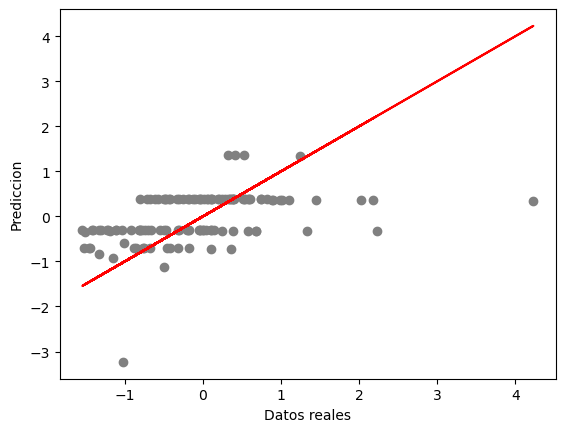

In [23]:
plt.scatter(prueba['salary_in_usd'],y_aprox,color='gray')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'],color='red')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

La gráfica de datos de predicción y reales no muestra una relación lineal clara entre las variables. En un modelo de regresión lineal múltiple, se esperaría que la distribución de puntos se aproxime a la línea recta. Sin embargo, en este caso, los puntos parecen estar dispuestos de manera horizontal y no siguen una tendencia lineal evidente. Esto sugiere que la relación entre las variables no puede ser adecuadamente modelada mediante una línea recta, lo que podría deberse a la presencia de efectos no lineales o relaciones más complejas entre las variables. 

Podemos concluir que el modelo de regresión lineal múltiple no sea el más adecuado.

Procedemos a hacer nuestra gráfica de residuos

In [24]:
residuos=len(tabla['Errores'])

Text(0, 0.5, 'valor del residuo')

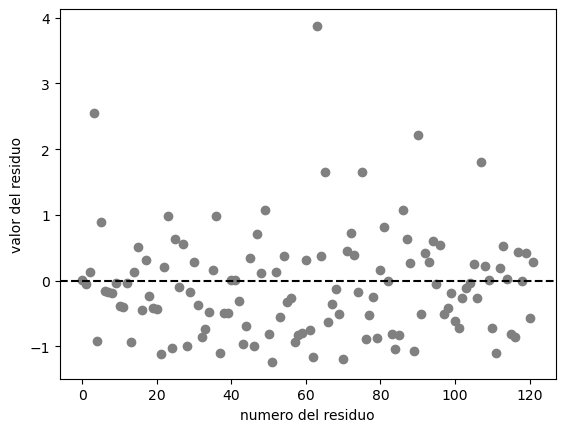

In [25]:
plt.scatter(range(residuos),tabla['Errores'],color='gray')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('numero del residuo')
plt.ylabel('valor del residuo')

Al ver nuestra gráfica de residuos podemos reafirmar con patrón no lineal en la distribución de los residuos, podría dar a entender que la relación probablemente no es bien modelada por una regresión lineal múltiple.

Proseguimos con el histograma de los residuos

Text(0, 0.5, 'Frecuencia(prob)')

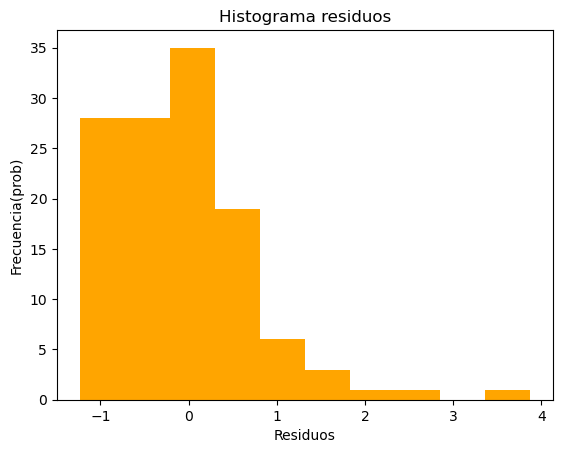

In [26]:
plt.hist(x=tabla['Errores'],color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia(prob)')

La forma en la que vemos el histograma de residuos puede interpretarse en el sentido de que los valores más grandes son más frecuentes  que los valores más pequeños y que la cola de la distribución se extiende hacia la derecha.

Que este cargado a la derecha puede significar que hay valores atípicos en ese lado que afectan la forma de la distribución. En el contexto de la regresión,, esta puede referirse a observaciones con valores inusualmente altos que afectan la relación entre variables y afectan la evaluación del modelo.

Antes de hacer nuestro test de de Kolmogorov estandarizamos los los errores residuales.

In [27]:
media=tabla['Errores'].mean()
std=tabla['Errores'].std()
errores_est =(tabla['Errores']-media)/std

Realizamos el test de Kolmogorov porque será lo que compare la distribución de los errores estandarizados con la distribución normal esperada. 

In [28]:
stats.kstest(errores_est,'norm')

KstestResult(statistic=0.08386626965908772, pvalue=0.3384571399227415, statistic_location=0.11879539469254466, statistic_sign=1)

Los resultados del test de Kolmogorov aplicado a los errores estandarizados del modelo de regresión lineal múltiple muestra un valor de aproximadamente 0.084 y un p--valor de 0.338. Y en este caso, dado que el p-valor es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que los errores estandarizados se distribuyen normalmente.

Por último haremos el QQ-plot que compara la distribución de los errores residuales con una distribución normal.

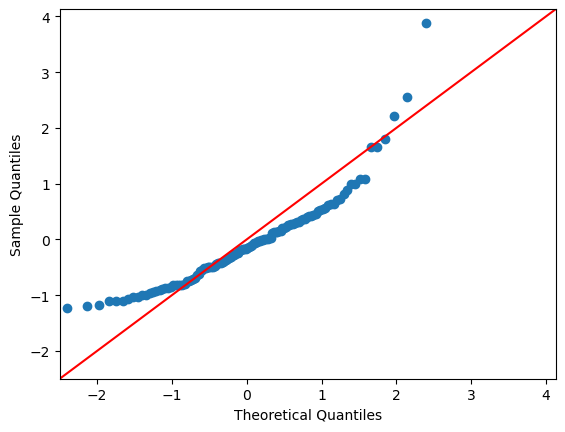

In [29]:
QQ=sm.qqplot(tabla['Errores'],stats.norm,line='45')

Para el QQ-plot que estamos graficando, se esperaría que los puntos se ajustaran a la línea roja, ya que esto significaría que los errores se distribuyen normalmente. En esete caso nuestros datos de los errores no son normales y por eso los puntos se desvían ligeramente hacia arriba.


En teoría esta gráfica se puede relacionar con nuestro histograma de residuos.